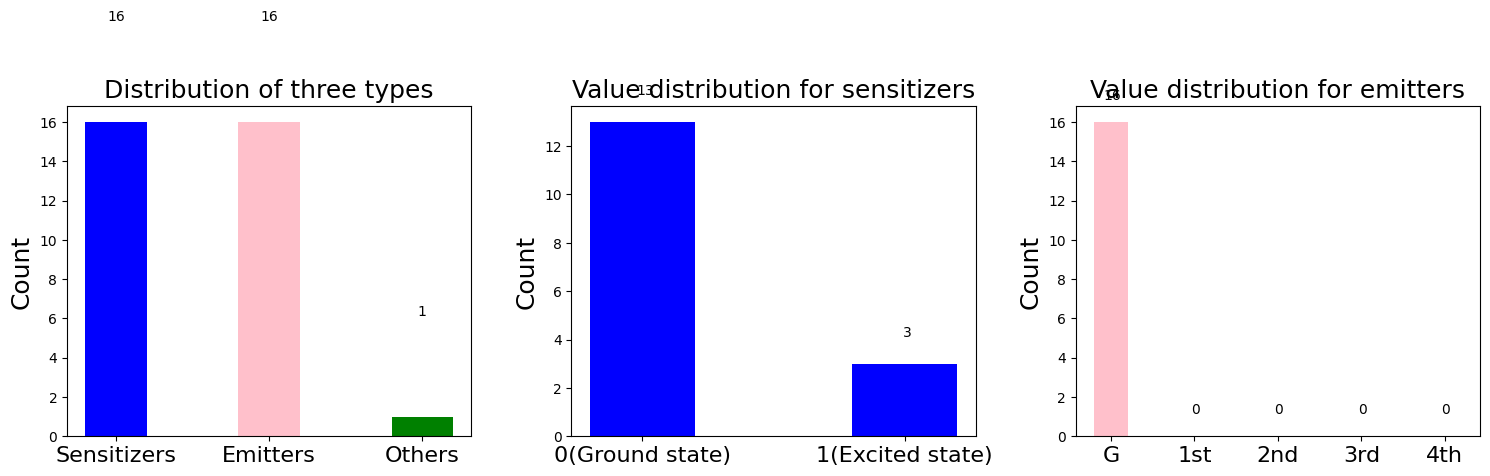

In [1]:
from point import Point
from lattice import Lattice

from utils import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

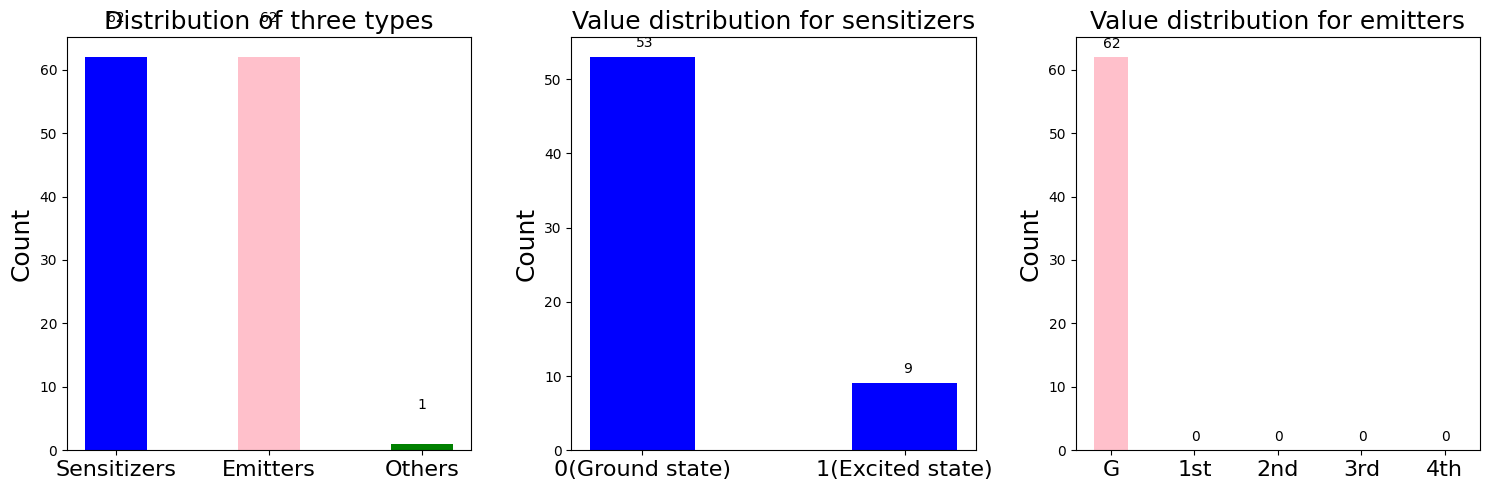

In [4]:
lattice = Lattice(0.5, 0.5, 3, 1)
lattice.plot_distributions()

In [5]:
lattice.plot_3d_points_with_plotly()

In [6]:
lattice.plot_3d_points_with_na()